# 1. Exploratory Data Analysis (EDA) #
## 1.1 Loading and Inspecting the Data ##

In [20]:
import pandas as pd

data = pd.read_csv('/Users/manish/Desktop/Deeplearning/Titanic-Dataset.csv')
data.head()
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### Output and Observations: ###

1. The dataset has 891 entries with 12 columns.
2. Some columns, like Age and Cabin, have missing values.
3. Survived is the target variable, with 0 for deceased and 1 for survived. 

## 1.2 Visualizing the Data Distribution ##

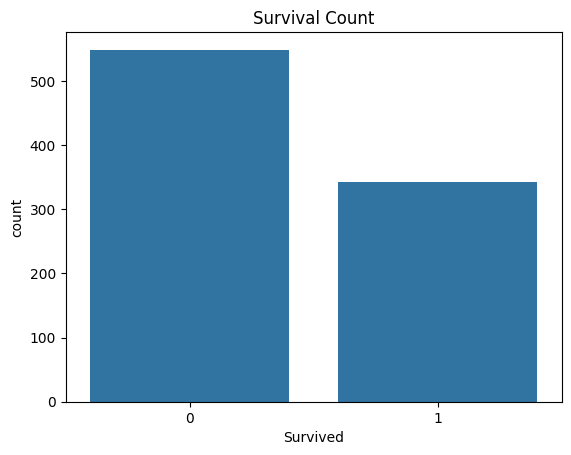

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()


### Observations: ###

There are more deceased (0) entries than survived (1) entries, indicating an imbalanced dataset.

## 1.3 Feature Correlation Heatmap ##

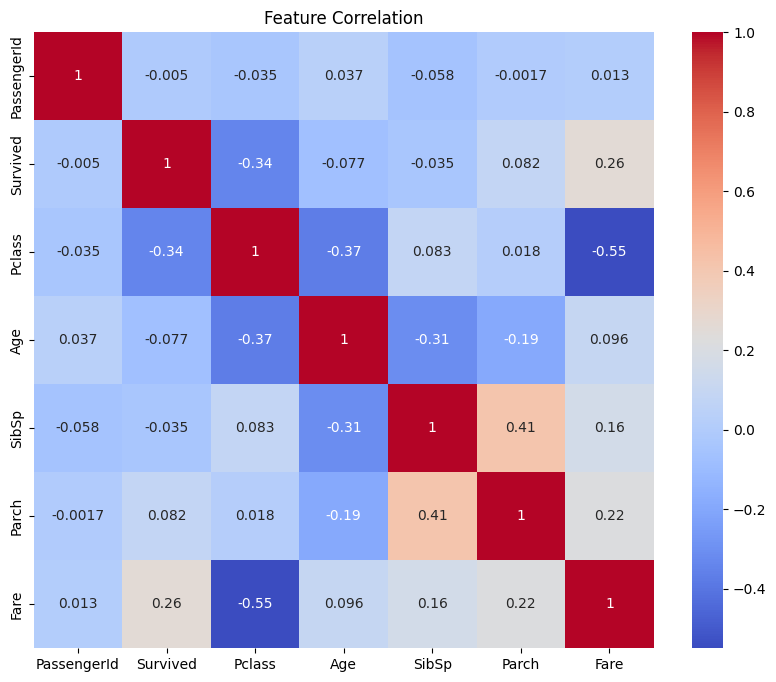

In [3]:
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[float, int])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


### Observations: ###

1. Higher correlation between Pclass (passenger class) and survival rate; lower classes had lower survival rates.
2. Strong correlation between Fare and survival as well, where higher fares correlate with a higher survival rate.

# 2. Feature Engineering #
## 2.1 Handling Missing Values #

In [4]:
# Fill missing values in 'Age' with the median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Fill missing values in 'Embarked' with the mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Drop the 'Cabin' column due to many missing values
data = data.drop(columns=['Cabin'])


### Explanation: ###

1. The Age column is filled with the median value, as age often varies widely among individuals.
2. The Embarked column is filled with the mode (most frequent value).
3. Dropped Cabin since it contains a high percentage of missing values, making it unsuitable for imputation.

## 2.2 Encoding Categorical Features ##

In [5]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)


### Explanation: ###

1. Categorical columns (Sex, Embarked) are one-hot encoded for easier use in neural networks.

## 2.3 Feature Scaling ##

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])


### Explanation: ###

1. Normalizing Age and Fare values to improve convergence when training the neural network.

# 3. Visualization of Engineered Features #
## 3.1 Age Distribution Before and After Scaling ##

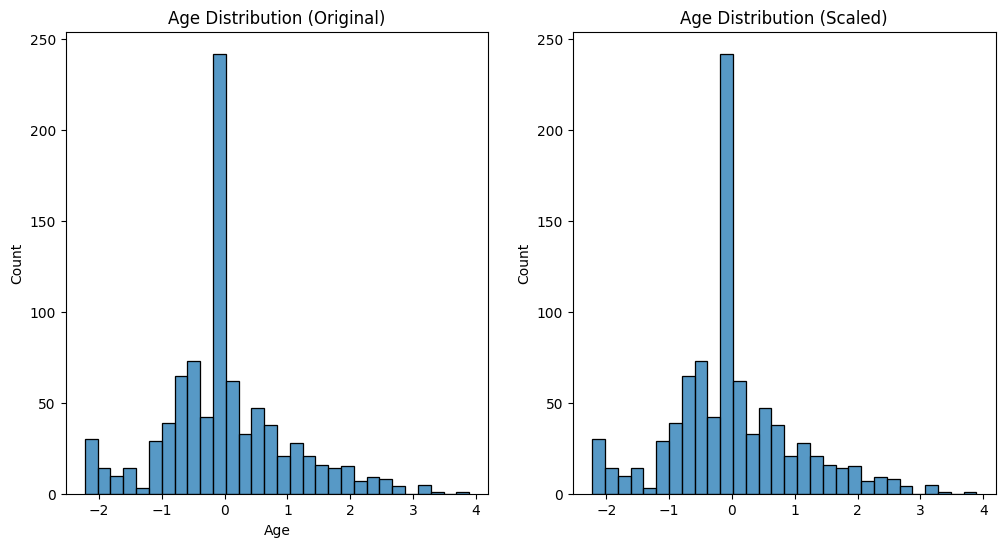

In [13]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Refit the scaler on the 'Age' column only
scaler = StandardScaler()
scaler.fit(data[['Age']])

# Plot the original and scaled age distributions
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot original distribution
sns.histplot(data['Age'], bins=30, ax=ax[0])
ax[0].set_title('Age Distribution (Original)')

# Plot scaled distribution
sns.histplot(scaler.transform(data[['Age']]).flatten(), bins=30, ax=ax[1])  
ax[1].set_title('Age Distribution (Scaled)')

plt.show()


### Explanation: ###

1. Visualizes the change in the Age feature before and after scaling.

## 3.2 Survival Rate by Class and Sex ##

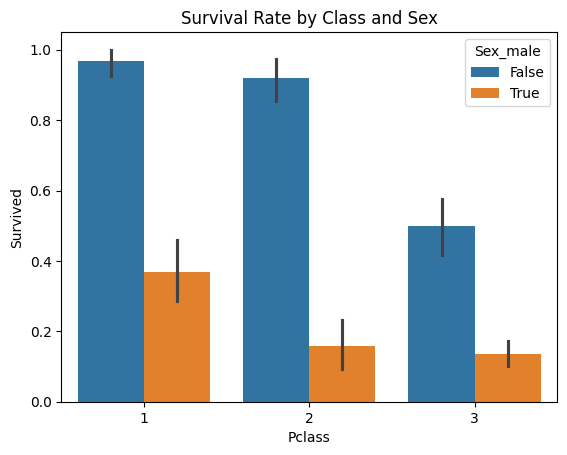

In [8]:
sns.barplot(x='Pclass', y='Survived', hue='Sex_male', data=data)
plt.title('Survival Rate by Class and Sex')
plt.show()

### Observations: ###

1. Males in higher classes had a higher survival rate compared to males in lower classes.
2. Female passengers generally had higher survival rates across classes.